<a href="https://colab.research.google.com/github/nvkaimak/Bank/blob/master/test_%E2%84%96_2_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install sktime

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
import statsmodels.tsa.api as smt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.api as smt
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sktime.utils.plotting import plot_series
from statsmodels.tsa.stattools import adfuller
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import  BaggingRegressor, StackingRegressor
from sklearn.svm import SVR, LinearSVR

# Read data

In [4]:
data_train = pd.read_excel('Train.xlsm',header=None, ).iloc[:,0].str.split(',',expand=True)
data_train.columns = data_train.iloc[0]
data_train.drop(labels = [0],axis = 0, inplace = True)
data_train.replace('',np.NaN,inplace = True)
data_train = data_train.iloc[:,1:]

In [5]:
data_test = pd.read_excel('Test.xlsm',header=None).iloc[:,0].str.split(',',expand=True)
data_test.columns = data_test.iloc[0]
data_test.drop(labels = [0],axis = 0, inplace = True)
data_test.replace('',np.NaN,inplace = True)
data_test = data_test.iloc[:,1:]

In [6]:
data_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,target
1,1,2023-06-15 03:30:00,12782.95425,59.23588424437302,2.2634372990353744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.157
2,2,2023-06-15 05:30:00,16020.04635,60.786256959314734,2.3121102783725958,0.10939218781524039,6.948746659268221,4.218512562878742,0.0013899,0.839454,62.963550000000005,0.21252592,0.0905351157024793,NaN,1.391
3,5,2023-06-15 08:30:00,1716.957,26.224643628509703,1.0049870410367174,0.10220852787525916,6.952210874913034,4.597456482202468,0.0017712,0.945714,53.08650000000001,0.26382528000000005,0.08881718181818181,NaN,1.053
4,3,2023-06-16 00:30:00,8280.340267500002,51.121028042827355,1.2927230785362265,0.1146676519936009,7.289475710340314,4.315477360166764,0.0016236,1.1369820000000002,56.23785000000001,0.2735965866666663,0.09757864462809919,NaN,1.612
5,3,2023-06-16 03:30:00,13642.148466,59.670783847980985,2.238833729216153,0.11669072854225353,7.440842402059267,4.344127209601205,0.0022386,0.8607060000000001,57.99330000000001,0.3395529066666663,0.10719907438016534,NaN,1.326


In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 1 to 615
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       615 non-null    object
 1   1       615 non-null    object
 2   2       615 non-null    object
 3   3       615 non-null    object
 4   4       615 non-null    object
 5   5       597 non-null    object
 6   6       597 non-null    object
 7   7       597 non-null    object
 8   8       612 non-null    object
 9   9       611 non-null    object
 10  10      612 non-null    object
 11  11      611 non-null    object
 12  12      611 non-null    object
 13  13      583 non-null    object
 14  target  613 non-null    object
dtypes: object(15)
memory usage: 72.2+ KB


In [8]:
data_train[data_train.drop(columns = ['1']).columns] = data_train[data_train.drop(columns = ['1']).columns].astype(float)
data_test[data_test.drop(columns = ['1']).columns] = data_test[data_test.drop(columns = ['1']).columns].astype(float)

In [9]:
data_train['1'] = data_train['1'].astype("datetime64[ns]")
data_test['1'] = data_test['1'].astype("datetime64[ns]")

In [10]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 1 to 615
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   0       615 non-null    float64       
 1   1       615 non-null    datetime64[ns]
 2   2       615 non-null    float64       
 3   3       615 non-null    float64       
 4   4       615 non-null    float64       
 5   5       597 non-null    float64       
 6   6       597 non-null    float64       
 7   7       597 non-null    float64       
 8   8       612 non-null    float64       
 9   9       611 non-null    float64       
 10  10      612 non-null    float64       
 11  11      611 non-null    float64       
 12  12      611 non-null    float64       
 13  13      583 non-null    float64       
 14  target  613 non-null    float64       
dtypes: datetime64[ns](1), float64(14)
memory usage: 72.2 KB


# EDA

In [11]:
data_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,target
1,1.0,2023-06-15 03:30:00,12782.954250,59.235884,2.263437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.157
2,2.0,2023-06-15 05:30:00,16020.046350,60.786257,2.312110,0.109392,6.948747,4.218513,0.001390,0.839454,62.96355,0.212526,0.090535,NaN,1.391
3,5.0,2023-06-15 08:30:00,1716.957000,26.224644,1.004987,0.102209,6.952211,4.597456,0.001771,0.945714,53.08650,0.263825,0.088817,NaN,1.053
4,3.0,2023-06-16 00:30:00,8280.340268,51.121028,1.292723,0.114668,7.289476,4.315477,0.001624,1.136982,56.23785,0.273597,0.097579,NaN,1.612
5,3.0,2023-06-16 03:30:00,13642.148466,59.670784,2.238834,0.116691,7.440842,4.344127,0.002239,0.860706,57.99330,0.339553,0.107199,NaN,1.326


In [12]:
data_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,target
count,615.000000,615,615.000000,615.000000,615.000000,597.000000,597.000000,597.000000,612.000000,611.000000,612.000000,611.000000,611.000000,583.000000,613.000000
mean,2.954472,2023-07-24 20:10:11.040650496,9939.170932,57.085602,2.409081,0.152994,7.786234,4.499874,0.002590,1.181338,53.164465,0.333088,0.171790,2.205883,1.444294
min,1.000000,2023-06-15 03:30:00,1259.530722,-18.046983,0.000000,0.040238,3.547604,2.984641,0.001230,0.573804,19.077300,0.024428,0.001718,1.320000,0.702000
25%,2.000000,2023-07-05 04:30:00,1956.632290,55.461647,2.184543,0.123887,7.486171,4.200636,0.002116,1.033378,47.555775,0.302911,0.103334,2.090000,1.261000
50%,3.000000,2023-07-24 17:30:00,9309.264714,57.292441,2.409306,0.137356,7.902816,4.454367,0.002497,1.190112,52.589475,0.339553,0.159252,2.260000,1.456000
75%,4.000000,2023-08-13 16:30:00,14601.400371,59.145775,2.497354,0.192659,8.240044,4.769608,0.002927,1.301685,58.358138,0.371310,0.206152,2.370000,1.592500
max,5.000000,2023-09-02 17:30:00,18951.446502,196.985248,54.536216,0.277930,9.839496,6.498580,0.007257,3.150609,86.292000,0.618035,0.723250,2.960000,3.854500
std,1.458841,NaN,5688.354327,8.653024,2.127838,0.046036,0.905280,0.514046,0.000715,0.233211,8.991924,0.063147,0.096526,0.268232,0.286834


## Анализ пропущенных значений.

In [13]:
data_train.isna().sum()

0
0          0
1          0
2          0
3          0
4          0
5         18
6         18
7         18
8          3
9          4
10         3
11         4
12         4
13        32
target     2
dtype: int64

In [14]:
print(f'''
  В данных отсутствуют значения в следующих признаках : 5, 6, 7, 8, 9, 10, 11, 12, 13, target.
  Общий процент пропусков: {round(100*data_train.isna().sum().sum()/data_train.shape[0],1)} %.''')


  В данных отсутствуют значения в следующих признаках : 5, 6, 7, 8, 9, 10, 11, 12, 13, target.
  Общий процент пропусков: 17.2 %.


Уровень пропущенных значений > 10% - достаточно высокий. В таргетной переменной всего 2 пропущенных значений, думаю, что можно удалить эти строки из выборки. Однако, стоит это сделать после дальнейшего анализа, так как значения остальных признаков в этик строках могут быть полезны.

In [15]:
data_train.loc[data_train['target'].isna()]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,target
113,5.0,2023-06-29 14:23:10,11639.183400,57.085905,2.180935,0.093205,7.363284,4.637674,0.001710,1.498266,56.74545,0.317567,0.132624,2.800,NaN
348,5.0,2023-07-29 17:30:00,16518.028176,56.678298,2.520322,0.229966,7.674976,4.295536,0.002743,1.360128,56.85120,0.486123,0.190347,2.355,NaN


In [16]:
data_train.iloc[:, list(data_train.isna().sum() > 0)].describe().T

,count,mean,std,min,25%,50%,75%,max
0,,,,,,,,
5,597.0,0.152994,0.046036,0.040238,0.123887,0.137356,0.192659,0.277930
6,597.0,7.786234,0.905280,3.547604,7.486171,7.902816,8.240044,9.839496
7,597.0,4.499874,0.514046,2.984641,4.200636,4.454367,4.769608,6.498580
8,612.0,0.002590,0.000715,0.001230,0.002116,0.002497,0.002927,0.007257
9,611.0,1.181338,0.233211,0.573804,1.033378,1.190112,1.301685,3.150609
10,612.0,53.164465,8.991924,19.077300,47.555775,52.589475,58.358138,86.292000
11,611.0,0.333088,0.063147,0.024428,0.302911,0.339553,0.371310,0.618035
12,611.0,0.171790,0.096526,0.001718,0.103334,0.159252,0.206152,0.723250
13,583.0,2.205883,0.268232,1.320000,2.090000,2.260000,2.370000,2.960000


Пропущенные признаки можно заменить средним значением.

In [17]:
data_train['5'].fillna(data_train['5'].mean(), inplace = True)
data_train['6'].fillna(data_train['6'].mean(), inplace = True)
data_train['7'].fillna(data_train['7'].mean(), inplace = True)
data_train['8'].fillna(data_train['8'].mean(), inplace = True)
data_train['9'].fillna(data_train['9'].mean(), inplace = True)
data_train['10'].fillna(data_train['10'].mean(), inplace = True)
data_train['11'].fillna(data_train['11'].mean(), inplace = True)
data_train['12'].fillna(data_train['12'].mean(), inplace = True)
data_train['13'].fillna(data_train['13'].mean(), inplace = True)

In [18]:
data_train.isna().sum()

0
0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
target    2
dtype: int64

## Выбросы

<ipython-input-19-a823205cce00>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot (4, 4, 1)


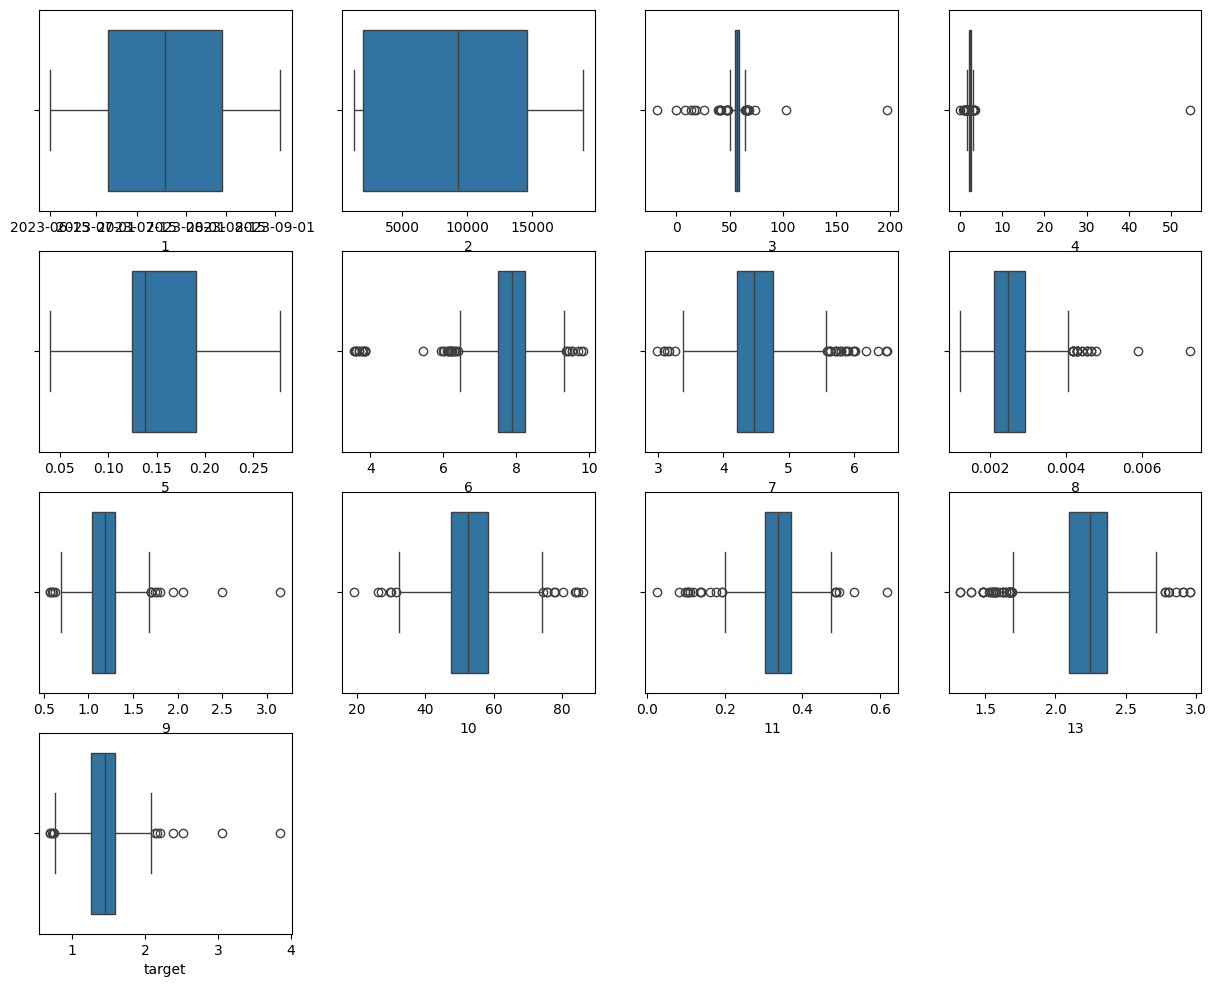

In [19]:
fig, ax = plt.subplots(figsize=(15, 12))
plt.subplot (4, 4, 1)
sns.boxplot(x=data_train.iloc[:,1])
plt.subplot (4, 4, 2)
sns.boxplot(x=data_train.iloc[:,2])
plt.subplot (4, 4, 3)
sns.boxplot(x=data_train.iloc[:,3])
plt.subplot (4, 4, 4)
sns.boxplot(x=data_train.iloc[:,4])

plt.subplot (4, 4, 5)
sns.boxplot(x=data_train.iloc[:,5])
plt.subplot (4, 4, 6)
sns.boxplot(x=data_train.iloc[:,6])
plt.subplot (4, 4, 7)
sns.boxplot(x=data_train.iloc[:,7])
plt.subplot (4, 4, 8)
sns.boxplot(x=data_train.iloc[:,8])

plt.subplot (4, 4, 9)
sns.boxplot(x=data_train.iloc[:,9])
plt.subplot (4, 4, 10)
sns.boxplot(x=data_train.iloc[:,10])
plt.subplot (4, 4, 11)
sns.boxplot(x=data_train.iloc[:,11])
plt.subplot (4, 4, 12)
sns.boxplot(x=data_train.iloc[:,13])
plt.subplot (4, 4, 13)
sns.boxplot(x=data_train.iloc[:,14])
plt.show()


Из графика видны сильные выбросы во многих признаках, но так как нет информации о природе признаков, на данный момент считать их действительно выбросами или ошибками в данных не целесообразно, за исключением явного выброса в 4 признаке. Этот выброс можно заменить средним значением, остальные признаки оставить как есть.

In [20]:
data_train.loc[data_train['4'] == data_train['4'].max(), '4'] = data_train['4'].mean()

<Axes: xlabel='4'>

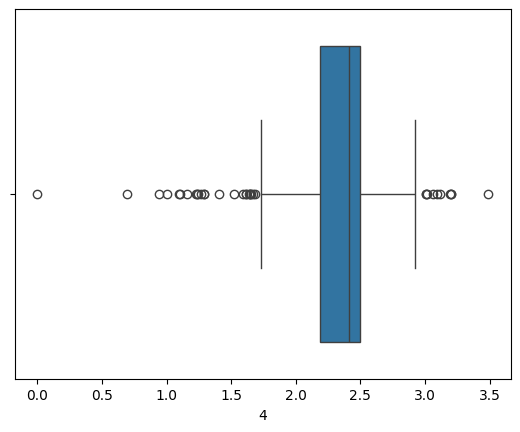

In [21]:
sns.boxplot(x=data_train.iloc[:,4])

## Корреляция

<Axes: xlabel='0', ylabel='0'>

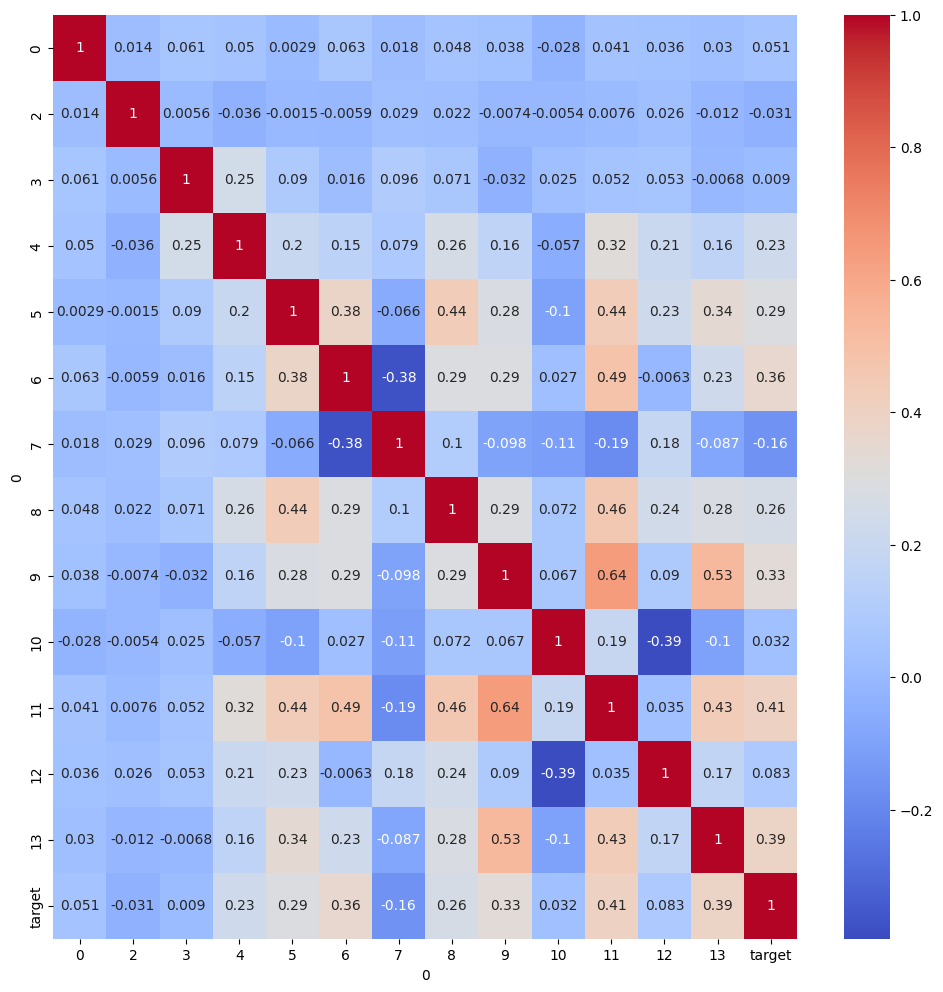

In [22]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(data_train.loc[:,data_train.dtypes == 'float64'].corr(), annot = True, cmap= 'coolwarm')

Слабую корреляцию с таргетным значением имеет признак 3. Ярко выраженной кореляции между другими признакми не выявлено.

## Временной ряд

In [23]:
print(data_train['0'].groupby(data_train['1'].dt.date).count().to_list())

[3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 8, 8, 8, 8, 4, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4, 6, 8, 8, 8, 8, 8, 8, 7, 8, 7]


In [24]:
data_train['0'].groupby(data_train['1'].dt.strftime('%H:%M')).count()

1
00:30    77
03:30    78
05:30    80
08:30    80
12:30    75
14:23     1
15:30    74
17:30    75
20:30    75
Name: 0, dtype: int64

Мы видим,что данные даны на каждый день в основном по 8 измерений в разное время. Однако, смущает полученное измерение в 14:23. Возможно стоит его заменить на 15:30, так как там мы наблюдаем 74 измерения, тогда как рядом стоящие времена имеют 75 измерений. Но как показал анализ пропущенных значений выше, в этой строке пропущенно таргетное значение, поэтому эти данные будут удалены.

In [25]:
data_train[data_train['1'].dt.strftime('%H:%M') == '14:23']

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,target
113,5.0,2023-06-29 14:23:10,11639.1834,57.085905,2.180935,0.093205,7.363284,4.637674,0.00171,1.498266,56.74545,0.317567,0.132624,2.8,NaN


In [26]:
# удаление пропущенных значения таргетной переменной.
data_train = data_train.loc[~data_train['target'].isna()]

In [27]:
data_train['0'].groupby(data_train['1'].dt.strftime('%H:%M')).count()

1
00:30    77
03:30    78
05:30    80
08:30    80
12:30    75
15:30    74
17:30    74
20:30    75
Name: 0, dtype: int64

Таким образом, мы получаем 8 групп измерений по времени. В дальнейшем эту информацию можно вынести как отдельные признаки, а также можно извлечь дополнительную информацию - месяц,будни/выходные, день недели.

In [28]:
data_train['time'] = data_train['1'].dt.strftime('%H:%M')


<ipython-input-28-40c20b414cc2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['time'] = data_train['1'].dt.strftime('%H:%M')


Проанализиурем визуально есть ли разница между временем измерения таргетного значения.

In [29]:
data_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,target,time
1,1.0,2023-06-15 03:30:00,12782.954250,59.235884,2.263437,0.152994,7.786234,4.499874,0.002590,1.181338,53.164465,0.333088,0.171790,2.205883,1.157,03:30
2,2.0,2023-06-15 05:30:00,16020.046350,60.786257,2.312110,0.109392,6.948747,4.218513,0.001390,0.839454,62.963550,0.212526,0.090535,2.205883,1.391,05:30
3,5.0,2023-06-15 08:30:00,1716.957000,26.224644,1.004987,0.102209,6.952211,4.597456,0.001771,0.945714,53.086500,0.263825,0.088817,2.205883,1.053,08:30
4,3.0,2023-06-16 00:30:00,8280.340268,51.121028,1.292723,0.114668,7.289476,4.315477,0.001624,1.136982,56.237850,0.273597,0.097579,2.205883,1.612,00:30
5,3.0,2023-06-16 03:30:00,13642.148466,59.670784,2.238834,0.116691,7.440842,4.344127,0.002239,0.860706,57.993300,0.339553,0.107199,2.205883,1.326,03:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,5.0,2023-09-02 05:30:00,16674.682842,54.857546,1.225993,0.060647,3.853280,5.443511,0.007257,0.701316,56.005200,0.024428,0.060471,1.480000,1.001,05:30
612,1.0,2023-09-02 08:30:00,1622.977398,57.068822,1.292497,0.054518,3.852563,5.875821,0.001230,0.573804,54.778500,0.105042,0.041574,1.395000,0.767,08:30
613,1.0,2023-09-02 12:30:00,8394.782706,55.175965,1.104599,0.062560,3.801755,5.290624,0.001230,0.818202,55.243800,0.161227,0.035046,1.395000,0.858,12:30
614,2.0,2023-09-02 15:30:00,13284.602640,57.883551,1.157647,0.048719,3.616467,5.981957,0.001230,0.626934,66.432150,0.109927,0.049476,1.320000,0.871,15:30


In [30]:
data_date_00_30 = data_train.loc[data_train['time'] == '00:30',['1','target']].set_index('1')
data_date_00_30.index = pd.to_datetime(data_date_00_30.index)

data_date_03_30 = data_train.loc[data_train['time'] == '03:30',['1','target']].set_index('1')
data_date_03_30.index = pd.to_datetime(data_date_03_30.index)

data_date_05_30 = data_train.loc[data_train['time'] == '05:30',['1','target']].set_index('1')
data_date_05_30.index = pd.to_datetime(data_date_05_30.index)

data_date_08_30 = data_train.loc[data_train['time'] == '08:30',['1','target']].set_index('1')
data_date_08_30.index = pd.to_datetime(data_date_08_30.index)

data_date_12_30 = data_train.loc[data_train['time'] == '12:30',['1','target']].set_index('1')
data_date_12_30.index = pd.to_datetime(data_date_12_30.index)

data_date_15_30 = data_train.loc[data_train['time'] == '15:30',['1','target']].set_index('1')
data_date_15_30.index = pd.to_datetime(data_date_15_30.index)

data_date_17_30 = data_train.loc[data_train['time'] == '17:30',['1','target']].set_index('1')
data_date_17_30.index = pd.to_datetime(data_date_17_30.index)

data_date_20_30 = data_train.loc[data_train['time'] == '20:30',['1','target']].set_index('1')
data_date_20_30.index = pd.to_datetime(data_date_20_30.index)

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='target'>)

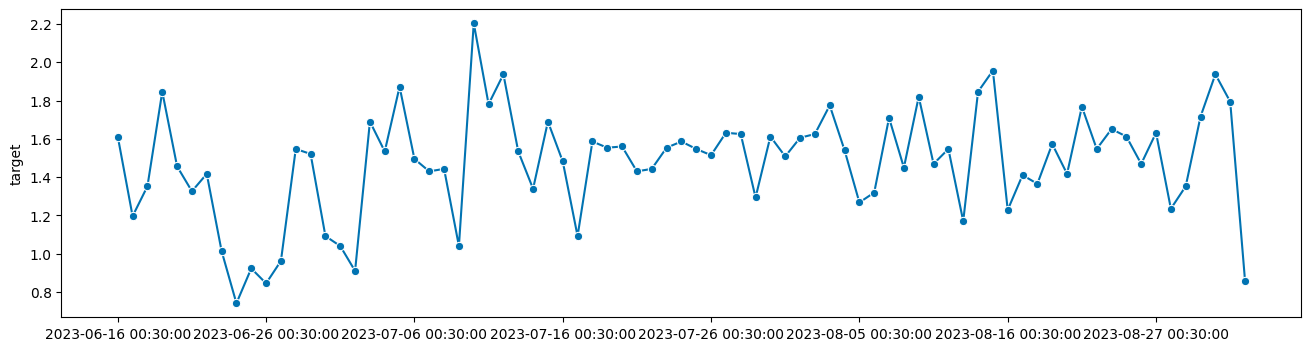

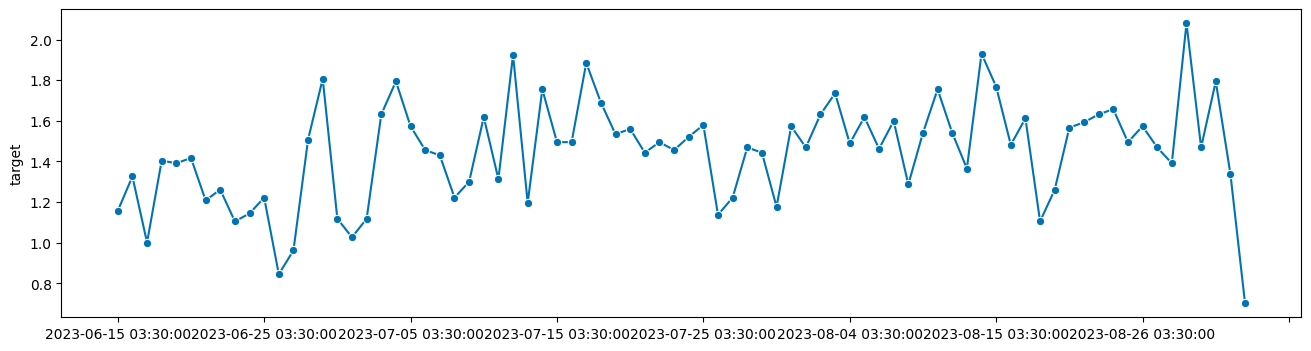

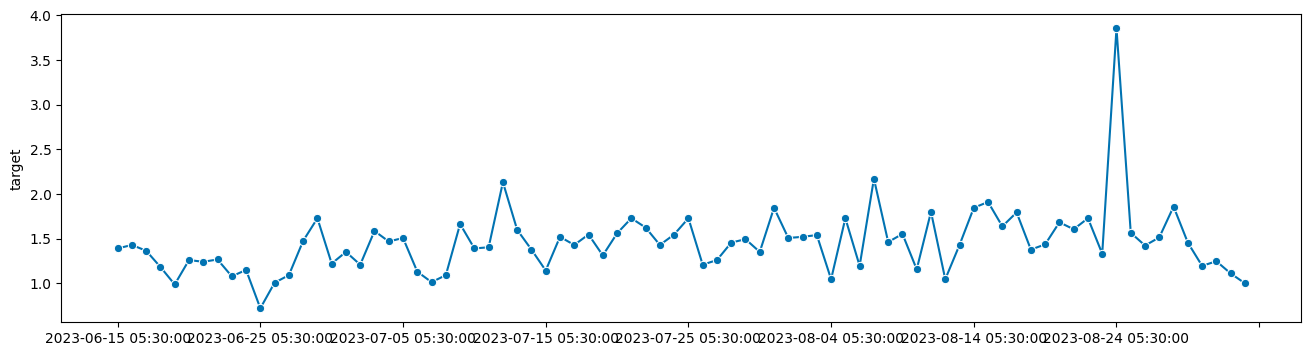

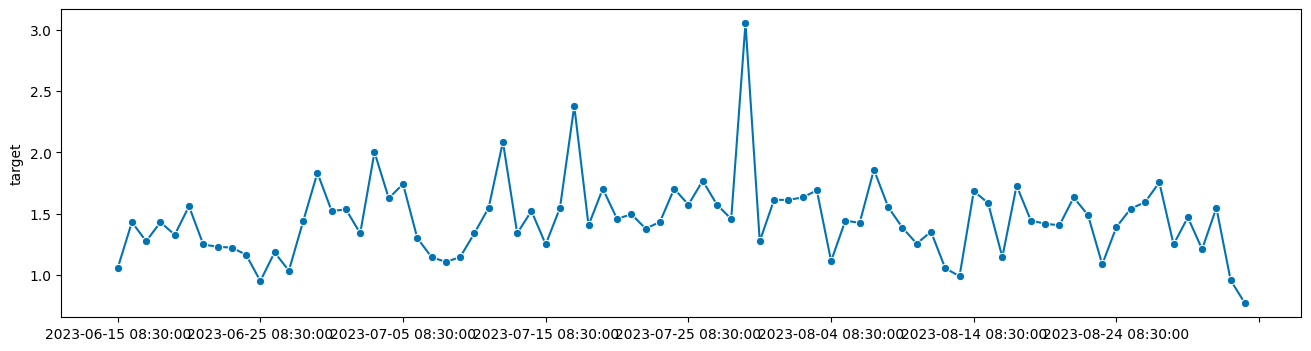

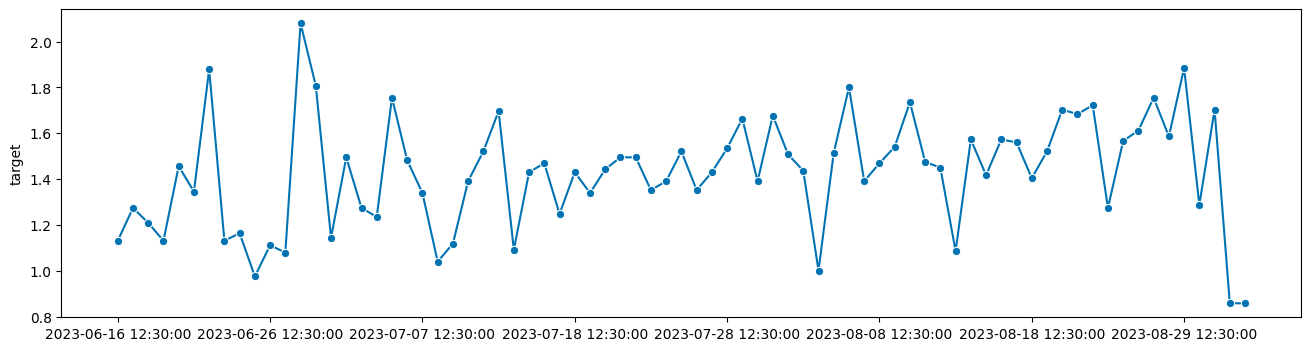

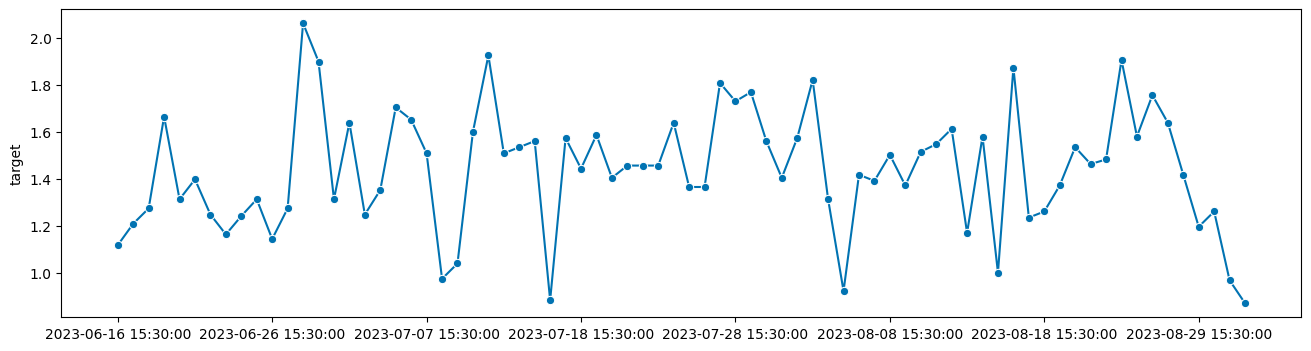

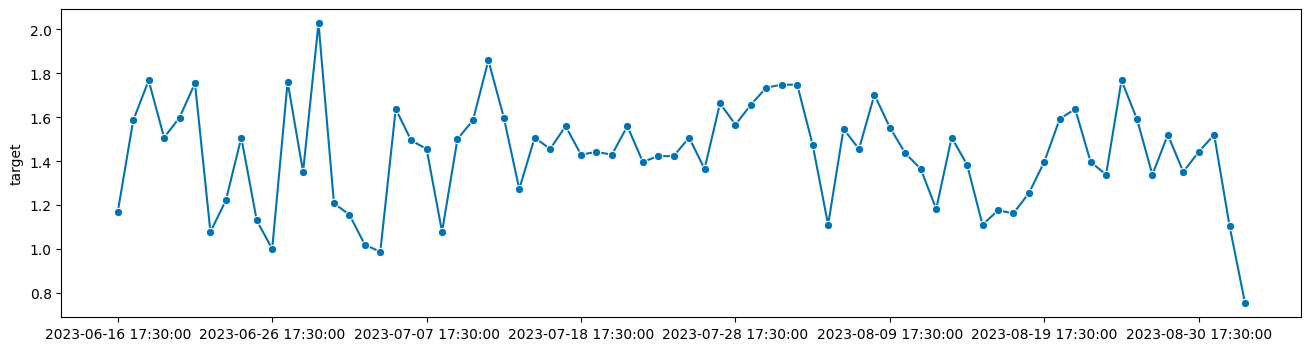

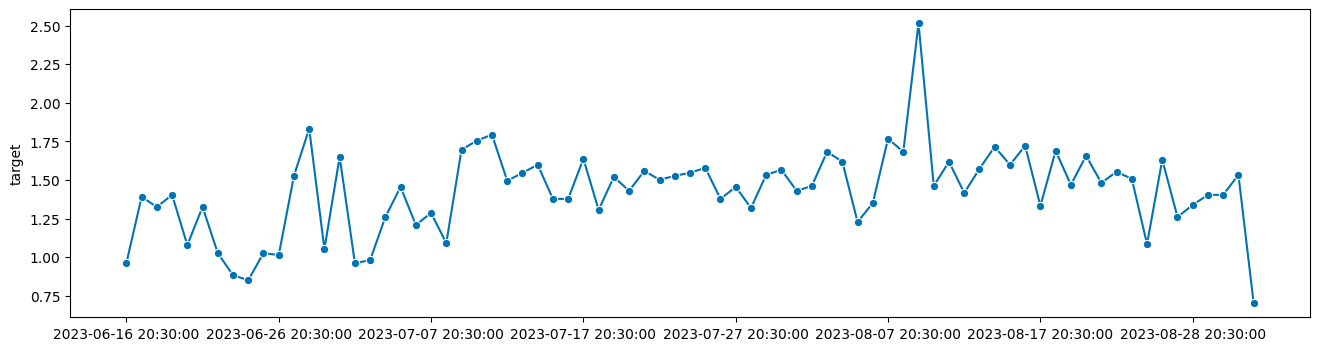

In [31]:
plot_series(data_date_00_30['target'])
plot_series(data_date_03_30['target'])
plot_series(data_date_05_30['target'])
plot_series(data_date_08_30['target'])
plot_series(data_date_12_30['target'])
plot_series(data_date_15_30['target'])
plot_series(data_date_17_30['target'])
plot_series(data_date_20_30['target'])

Визуально целевая переменная ведет себя по разному. В 5-30 утра визуально меньше колебаний.

In [32]:
data_train[data_train['target'] == data_train['target'].max()]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,target,time
540,3.0,2023-08-24 05:30:00,5267.888028,57.940138,2.805585,0.128331,7.80571,4.490567,0.00289,1.089165,74.0673,0.329782,0.115445,2.34,3.8545,05:30


In [33]:
data_train[data_train['target'] == data_train['target'].min()]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,target,time
608,4.0,2023-09-01 20:30:00,1631.332494,57.693769,1.266176,0.056305,3.779191,5.715477,0.00123,0.791637,46.76265,0.097713,0.075074,1.885,0.702,20:30
610,2.0,2023-09-02 03:30:00,13343.088312,57.947087,1.239359,0.058810,3.853065,5.573103,0.00123,0.573804,51.16185,0.102599,0.059441,1.595,0.702,03:30


In [34]:
data_date = data_train[['1','target']].set_index('1')

In [35]:
data_date

,target
1,
2023-06-15 03:30:00,1.157
2023-06-15 05:30:00,1.391
2023-06-15 08:30:00,1.053
2023-06-16 00:30:00,1.612
2023-06-16 03:30:00,1.326
...,...
2023-09-02 05:30:00,1.001
2023-09-02 08:30:00,0.767
2023-09-02 12:30:00,0.858


<Figure size 1500x2000 with 0 Axes>

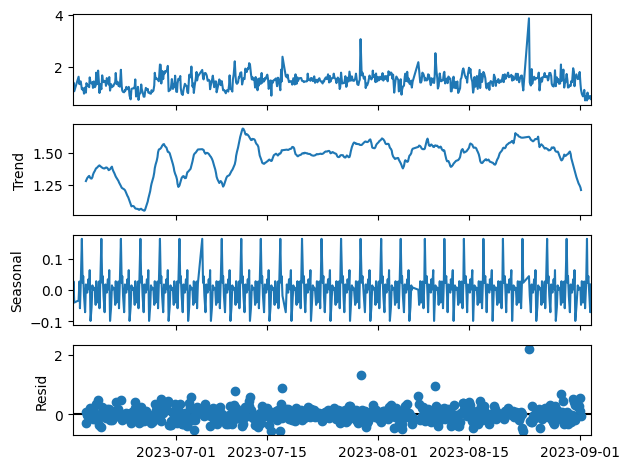

In [36]:
plt.figure(figsize=(15, 20))
result = seasonal_decompose(data_date, model='additive', period = 24)
result.plot()
plt.show()

Визуально наблюдаем отсутствие тренда и сезонности. Проверим с помощью теста  Дики-Фуллера.

In [37]:
def test_adfuller(dict_):
  for key, value in dict_.items():
      res =  adfuller(value)[1]
      print(key, res)

In [38]:
adfuller(data_date['target'])[1]

0.00022223504507364446

Ряд стационарен.

## Признак № 0

In [39]:
data_train['0'].unique()

array([1., 2., 5., 3., 4.])

Данный признак похож на категриальный признак.

<Axes: xlabel='0'>

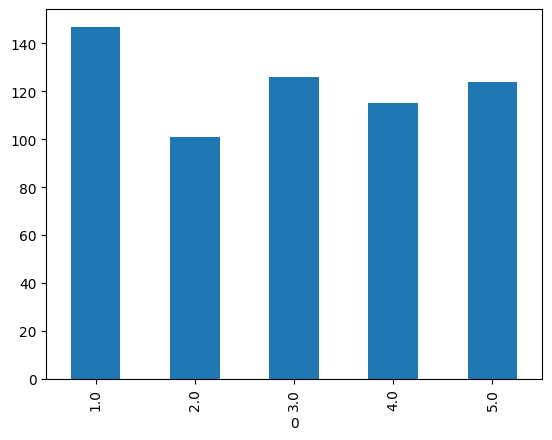

In [40]:
data_train.groupby(by='0').count()['1'].plot.bar()

# Train datasets

In [41]:
target = data_train['target']

Подготовим несколько наборов признаков.

In [42]:
data_train_1 = data_train.drop(columns = 'target').copy()
data_train_2 = data_train.drop(columns = 'target').copy()
data_train_3 = data_train.drop(columns = 'target').copy()

1 - Извлечем дополнительные признаки из даты и преобразуем категриальные переменную 0 и переменные времени.

In [43]:
data_train_1["dayofweek"] = data_train_1['1'].dt.dayofweek
data_train_1["quarter"] = data_train_1['1'].dt.quarter
data_train_1["month"] = data_train_1['1'].dt.month
data_train_1['dayofyear'] = data_train_1['1'].dt.dayofyear
data_train_1['dayofmonth'] = data_train_1['1'].dt.day
data_train_1['weekofyear'] = data_train_1['1'].dt.isocalendar().week
data_train_1 = pd.get_dummies(data_train_1, columns=['0'], drop_first= True, dtype=int)
data_train_1 = pd.get_dummies(data_train_1, columns=['time'], drop_first= True, dtype=int)
data_train_1.drop(columns = '1', inplace = True)

2 - Переведем дату в формат unixtime и преобразуем категриальную переменную 0

In [44]:
data_train_2['1'] = data_train_2['1'].astype ( np.int64 )/1000000
data_train_2 = pd.get_dummies(data_train_2, columns=['0'], drop_first= True, dtype=int)
data_train_2.drop(columns = 'time', inplace = True)

3 и 4- стандартизируем признаковое пространство кроме категориальных переменных.

In [45]:
st = StandardScaler()

In [46]:
data_train_1_st = pd.DataFrame(st.fit_transform(data_train_1.iloc[:,:18]),columns = data_train_1.iloc[:,:18].columns, index=data_train_1.iloc[:,:18].index)
data_train_1_st = data_train_1_st.merge(data_train_1.iloc[:,18:], left_index=True, right_index=True, how='inner')

In [47]:
data_train_2_st = pd.DataFrame(st.fit_transform(data_train_2.iloc[:,:13]),columns = data_train_2.iloc[:,:13].columns, index=data_train_2.iloc[:,:13].index)
data_train_2_st = data_train_2_st.merge(data_train_2.iloc[:,13:], left_index=True, right_index=True, how='inner')

5 и 6 -нормализуем признаковое пространство кроме категориальных переменных.

In [48]:
norm = MinMaxScaler()

In [49]:
data_train_1_norm = pd.DataFrame(norm.fit_transform(data_train_1.iloc[:,:18]),columns = data_train_1.iloc[:,:18].columns, index=data_train_1.iloc[:,:18].index)
data_train_1_norm = data_train_1_norm.merge(data_train_1.iloc[:,18:], left_index=True, right_index=True, how='inner')

In [50]:
data_train_2_norm = pd.DataFrame(norm.fit_transform(data_train_2.iloc[:,:13]),columns = data_train_2.iloc[:,:13].columns, index=data_train_2.iloc[:,:13].index)
data_train_2_norm = data_train_2_norm.merge(data_train_2.iloc[:,13:], left_index=True, right_index=True, how='inner')

7 - перевод даты в unixtime без дополнительной обработки других признаков.

In [51]:
data_train_3['1'] = data_train_3['1'].astype ( np.int64 )/1000000
data_train_3.drop(columns = 'time', inplace = True)

In [52]:
info_dataset = pd.DataFrame({'1-ый':data_train_1.shape[1],
                             '2-ой':data_train_2.shape[1],
                             '3-ий':data_train_1_st.shape[1],
                             '4-ый':data_train_2_st.shape[1],
                             '5-ый':data_train_1_norm.shape[1],
                             '6-ой':data_train_2_norm.shape[1],
                             '7-ой':data_train_3.shape[1],}
                            , index=['Количество признаков'])

In [53]:
info_dataset

,1-ый,2-ой,3-ий,4-ый,5-ый,6-ой,7-ой
Количество признаков,29,17,29,17,29,17,14


In [54]:
data_train_1_st.head()

,2,3,4,5,6,7,8,9,10,11,...,0_3.0,0_4.0,0_5.0,time_03:30,time_05:30,time_08:30,time_12:30,time_15:30,time_17:30,time_20:30
1,0.502481,0.248222,-0.197163,0.000620,-0.000976,-0.000214,-0.001661,0.003483,0.001321,0.003579,...,0,0,0,1,0,0,0,0,0,0
2,1.071755,0.427248,-0.039320,-0.963547,-0.939375,-0.555419,-1.683420,-1.469057,1.093161,-1.919717,...,0,0,0,0,1,0,0,0,0,0
3,-1.443579,-3.563672,-4.278229,-1.122398,-0.935494,0.192344,-1.148868,-1.011381,-0.007366,-1.101352,...,0,0,1,0,0,1,0,0,0,0
4,-0.289346,-0.688822,-3.345121,-0.846891,-0.557591,-0.364080,-1.355791,-0.187565,0.343766,-0.945473,...,1,0,0,0,0,0,0,0,0,0
5,0.653579,0.298441,-0.276951,-0.802155,-0.387985,-0.307546,-0.493611,-1.377522,0.539363,0.106711,...,1,0,0,1,0,0,0,0,0,0


In [55]:
data_train_1_norm.head()

,2,3,4,5,6,7,8,9,10,11,...,0_3.0,0_4.0,0_5.0,time_03:30,time_05:30,time_08:30,time_12:30,time_15:30,time_17:30,time_20:30
1,0.651338,0.359401,0.648402,0.474378,0.673665,0.431206,0.225570,0.235770,0.507139,0.519973,...,0,0,0,1,0,0,0,0,0,0
2,0.834308,0.366611,0.662345,0.290939,0.540560,0.351136,0.026531,0.103093,0.652926,0.316872,...,0,0,0,0,1,0,0,0,0,0
3,0.025855,0.205884,0.287896,0.260716,0.541110,0.458977,0.089796,0.144330,0.505979,0.403292,...,0,0,1,0,0,1,0,0,0,0
4,0.396837,0.321663,0.370323,0.313134,0.594713,0.378731,0.065306,0.218557,0.552863,0.419753,...,1,0,0,0,0,0,0,0,0,0
5,0.699903,0.361424,0.641354,0.321645,0.618771,0.386884,0.167347,0.111340,0.578980,0.530864,...,1,0,0,1,0,0,0,0,0,0


# Test datasets

Анологично data_train_1_norm проведем подготовку тестовых наборов данных.

In [56]:
data_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
1,3.0,2023-09-02 20:30:00,1622.977398,61.080367,1.134466,0.052428,3.618332,5.666092,0.00123,0.711942,70.38720,0.139241,0.075589,1.32
2,3.0,2023-09-03 00:30:00,8139.952278,56.248711,1.115395,0.054782,3.616584,5.470960,0.00123,0.616308,77.32440,0.124584,0.088817,1.25
3,4.0,2023-09-03 03:30:00,12994.263054,58.832462,1.097353,0.055897,3.610015,5.401290,0.00123,1.370754,69.81615,0.163669,0.100671,1.32
4,1.0,2023-09-03 05:30:00,16355.100420,55.347183,1.087664,0.053584,3.646805,5.786057,0.00123,0.711942,67.61655,0.127027,0.075417,1.33
5,3.0,2023-09-03 08:30:00,1631.332494,59.911900,1.315939,0.052016,3.639497,5.924817,0.00123,1.051974,66.49560,0.127027,0.060643,1.34


In [57]:
data_test.isna().sum()

0
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

In [58]:
data_test['time'] = data_test['1'].dt.strftime('%H:%M')

In [59]:
data_test["dayofweek"] = data_test['1'].dt.dayofweek
data_test["quarter"] = data_test['1'].dt.quarter
data_test["month"] = data_test['1'].dt.month
data_test['dayofyear'] = data_test['1'].dt.dayofyear
data_test['dayofmonth'] = data_test['1'].dt.day
data_test['weekofyear'] = data_test['1'].dt.isocalendar().week
data_test = pd.get_dummies(data_test, columns=['0'], drop_first= True, dtype=int)
data_test = pd.get_dummies(data_test, columns=['time'], drop_first= True, dtype=int)
data_test.drop(columns = '1', inplace = True)

In [60]:
norm = MinMaxScaler()

In [61]:
data_test_1_norm = pd.DataFrame(norm.fit_transform(data_test.iloc[:,:18]),columns = data_test.iloc[:,:18].columns, index=data_test.iloc[:,:18].index)
data_test_1_norm = data_test_1_norm.merge(data_test.iloc[:,18:], left_index=True, right_index=True, how='inner')

# func

In [62]:
def im(pred,test):
  with plt.style.context('bmh'):
    plt.figure(figsize=(8, 5))
    plt.plot(pd.DataFrame(pred).values, color='blue', linewidth='4',label='predict')
    plt.plot(pd.DataFrame(test).values, color='red' ,label='real')
    plt.legend()

    plt.tight_layout()

In [63]:
def metrics(x,y,model):
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1,random_state= 42)
  model = model
  model.fit(X_train, y_train)
  r2_train = r2_score(y_train, model.predict(X_train))
  r2_test = r2_score(y_test, model.predict(X_test))
  rmse_train = sqrt(mean_squared_error(model.predict(X_train), y_train))
  rmse_test = sqrt(mean_squared_error(model.predict(X_test), y_test))
  pred = model.predict(X_test)
  return r2_train, r2_test, rmse_train, rmse_test

In [64]:
def res_pred(x,y,model):
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1,random_state= 42)
  model = model
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  return y_test, pred

def res_test(x,y,model,test):
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1,random_state= 42)
  model = model
  model.fit(X_train, y_train)
  pred = model.predict(test)
  return pred

# lr

In [65]:
res = pd.DataFrame({
              '1-ый':metrics(data_train_1,target,LinearRegression()),
              '2-ой':metrics(data_train_2,target,LinearRegression()),
              '3-ий':metrics(data_train_1_st,target,LinearRegression()),
              '4-ый':metrics(data_train_2_st,target,LinearRegression()),
              '5-ый':metrics(data_train_1_norm,target,LinearRegression()),
              '6-ой':metrics(data_train_2_norm,target,LinearRegression()),
              '7-ой':metrics(data_train_3,target,LinearRegression()),
              },
             index = ['r2_train','r2_test','rmse_train','rmse_test'])
res.T

,r2_train,r2_test,rmse_train,rmse_test
1-ый,0.343332,0.333606,0.230531,0.246738
2-ой,0.276273,0.307682,0.242016,0.251491
3-ий,0.343332,0.333606,0.230531,0.246738
4-ый,0.276273,0.307682,0.242016,0.251491
5-ый,-4.143325,-4.929030,0.645176,0.735972
6-ой,0.276273,0.307682,0.242016,0.251491
7-ой,0.274032,0.310879,0.242390,0.250910


Лучше результат дает набор № 1, № 3.

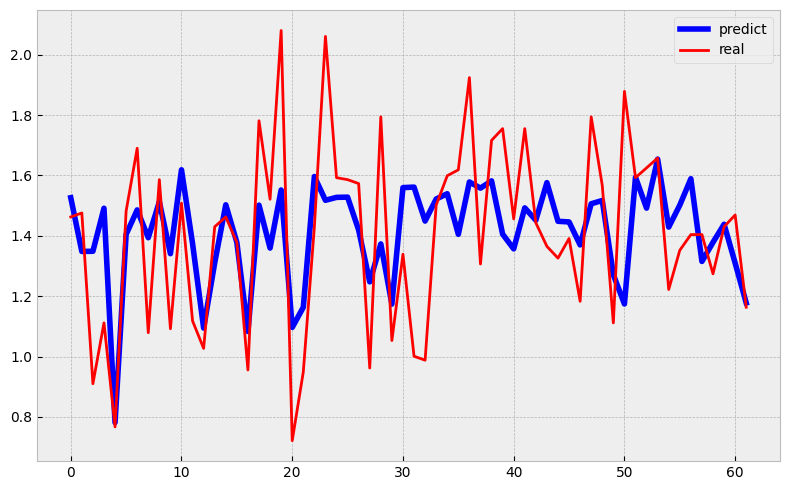

In [66]:
y_test, pred = res_pred(data_train_1,target, LinearRegression())
im(pred,y_test)

Посмотрим важность признаков 1-го набора.

In [67]:
X_train, X_test, y_train, y_test = train_test_split(data_train_1, target, test_size=0.1,random_state= 42)

In [68]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [69]:
abs_coefficients = np.abs(lr.coef_)
feature_importance = dict(zip(data_train_1.columns, abs_coefficients))
sorted_feature_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
top_features = 10
name_top_features_lr = []
print(f"Топ {top_features} самых важных признаков:")
for feature, importance in sorted_feature_importance[:top_features]:
    print(f"{feature}: {importance}")
    name_top_features_lr.append(feature)

Топ 10 самых важных признаков:
8: 19.709080866936628
11: 0.61507735642784
time_05:30: 0.5670390651148493
time_17:30: 0.5619781972763721
time_20:30: 0.49632990181353986
time_08:30: 0.4615781423465899
time_03:30: 0.3316195855377396
time_15:30: 0.31821857281476873
13: 0.18676800126680992
4: 0.10113107057298962


Обучим модель только на этих признаках.

In [70]:
res = pd.DataFrame({
              '1-ый':metrics(data_train_1[name_top_features_lr],target,LinearRegression()),
              },
             index = ['r2_train','r2_test','rmse_train','rmse_test'])
res.T

,r2_train,r2_test,rmse_train,rmse_test
1-ый,0.230285,0.204825,0.249586,0.269526


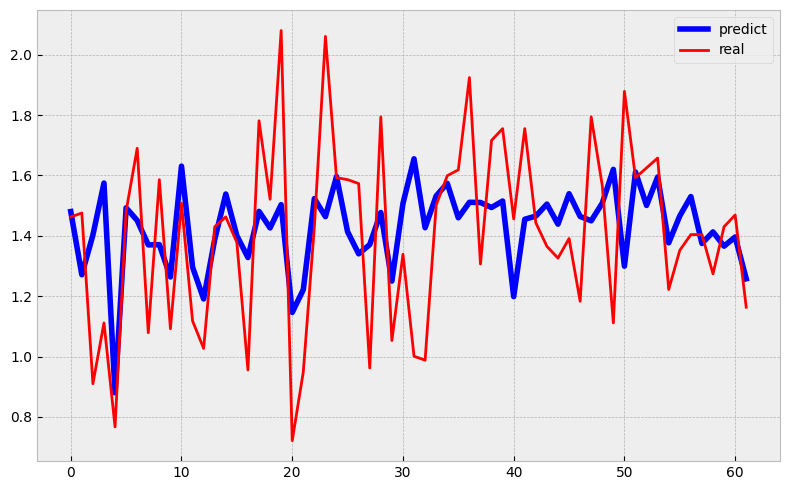

In [71]:
y_test, pred = res_pred(data_train_1[name_top_features_lr],target,lr)
im(pred,y_test)

Качество упало.

## Другой подход к рзделению данных

In [72]:
def prepareData(data, lag_start=1, lag_end=12, test_size=0.15):

    data = pd.DataFrame(data.drop(columns = 'time').copy())

    # считаем индекс в датафрейме, после которого начинается тестовый отрезок
    test_index = int(len(data)*(1-test_size))

    # добавляем лаги исходного ряда в качестве признаков
    for i in range(lag_start, lag_end):
        data["lag_{}".format(i)] = data.target.shift(i)

    data = data.dropna()
    data = data.reset_index(drop=True)

    # разбиваем весь датасет на тренировочную и тестовую выборку
    X_train = data.loc[:test_index].drop(["target"], axis=1)
    y_train = data.loc[:test_index]["target"]
    X_test = data.loc[test_index:].drop(["target"], axis=1)
    y_test = data.loc[test_index:]["target"]

    return X_train, X_test, y_train, y_test

In [73]:
data_train_4 = data_train.copy()
data_train_4 = pd.get_dummies(data_train_4, columns=['0'], drop_first= True, dtype=int)
data_train_4.drop(columns = '1', inplace = True)

In [74]:
# Подберу lag_end
min_mse = np.inf
lag = 5
for i in range(1,100):
  try:
    X_train, X_test, y_train, y_test = prepareData(data_train_4, lag_start=1, lag_end=i, test_size=0.2)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    prediction = lr.predict(X_test)
    mse_tmp = mean_squared_error(prediction,  y_test )
    if min_mse > mse_tmp:
      min_mse = mse_tmp
      lag = i
  except: break

print(lag)

97


In [75]:
X_train, X_test, y_train, y_test = prepareData(data_train_4, lag_start=1, lag_end=97, test_size=0.2)

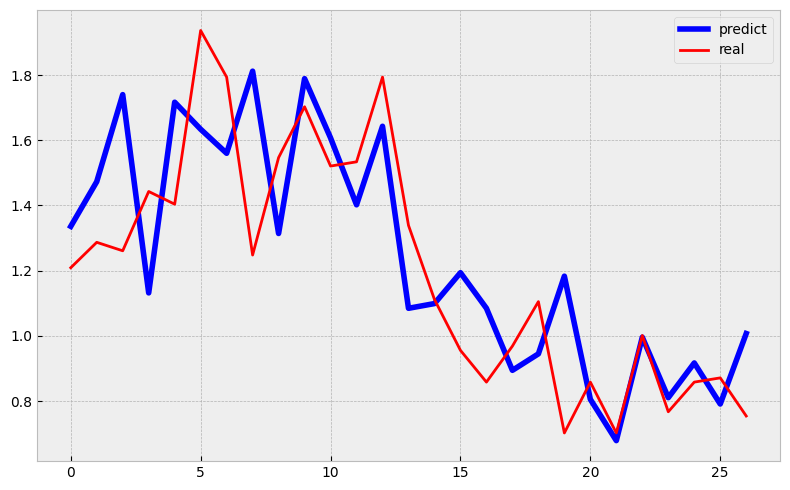

In [76]:
lr = LinearRegression()
lr.fit(X_train, y_train)
prediction = lr.predict(X_test)

with plt.style.context('bmh'):
    plt.figure(figsize=(8, 5))
    plt.plot(pd.DataFrame(prediction).values, color='blue', linewidth='4',label='predict')
    plt.plot(pd.DataFrame(y_test).values, color='red' ,label='real')
    plt.legend()

    plt.tight_layout()

In [77]:
r2_train = r2_score(y_train, lr.predict(X_train))
r2_test = r2_score(y_test, lr.predict(X_test))
rmse_train = sqrt(mean_squared_error(lr.predict(X_train), y_train))
rmse_test = sqrt(mean_squared_error(lr.predict(X_test), y_test))

In [78]:
res = pd.DataFrame({
              'другой подход':[r2_train, r2_test, rmse_train, rmse_test],
              },
             index = ['r2_train','r2_test','rmse_train','rmse_test'])
res.T

,r2_train,r2_test,rmse_train,rmse_test
другой подход,0.289284,0.55065,0.223315,0.240701


# Polinom lr

In [79]:
pf= PolynomialFeatures(degree=2)

In [80]:
res = pd.DataFrame({
              '1-ый':metrics(pf.fit_transform(data_train_1),target,LinearRegression()),
              '2-ой':metrics(pf.fit_transform(data_train_2),target,LinearRegression()),
              '3-ий':metrics(pf.fit_transform(data_train_1_st),target,LinearRegression()),
              '4-ый':metrics(pf.fit_transform(data_train_2_st),target,LinearRegression()),
              '5-ый':metrics(pf.fit_transform(data_train_1_norm),target,LinearRegression()),
              '6-ой':metrics(pf.fit_transform(data_train_2_norm),target,LinearRegression()),
              '7-ой':metrics(pf.fit_transform(data_train_3),target,LinearRegression()),
              },
             index = ['r2_train','r2_test','rmse_train','rmse_test'])
res.T

,r2_train,r2_test,rmse_train,rmse_test
1-ый,0.436218,-1.705635,0.213605,0.497169
2-ой,0.276204,0.307033,0.242027,0.251609
3-ий,0.816664,0.107416,0.121809,0.285558
4-ый,0.512241,0.374110,0.198682,0.239122
5-ый,0.816809,0.109499,0.121761,0.285224
6-ой,0.512240,0.373765,0.198682,0.239187
7-ой,0.273965,0.309487,0.242401,0.251163


Лучше результат дает набор № 4.

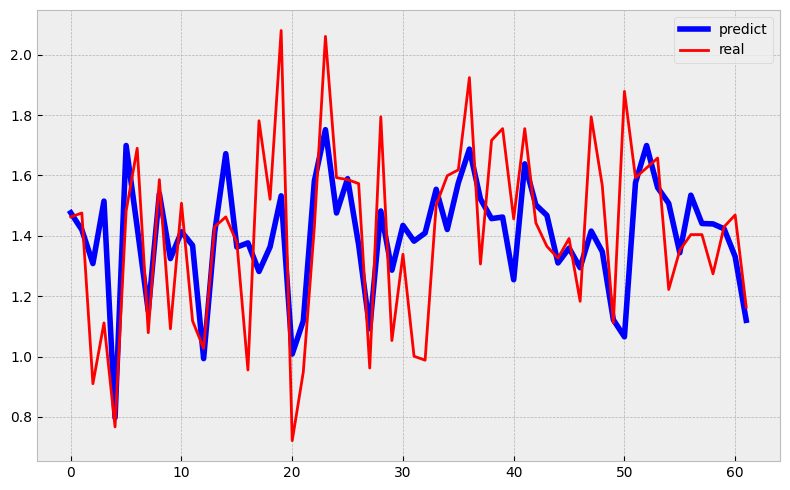

In [81]:
y_test, pred = res_pred(pf.fit_transform(data_train_2_st),target,LinearRegression())
im(pred,y_test)

# Дерево решений

In [82]:
from sklearn.model_selection import GridSearchCV

Подберем параметры на примере 1- го набора.

In [83]:
model_tree = DecisionTreeRegressor(random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(data_train_1,target,test_size=0.2, random_state= 42)
param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['auto', 'sqrt']
}
grid_search = GridSearchCV(estimator=model_tree, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("Наилучшие гиперпараметры:", grid_search.best_params_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
Наилучшие гиперпараметры: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 20}


In [84]:
model_tree = DecisionTreeRegressor(max_depth = 5 ,max_features =  'sqrt',min_samples_leaf = 6, min_samples_split = 20, random_state = 42)
res = pd.DataFrame({
              '1-ый':metrics(data_train_1,target,model_tree),
              },
             index = ['r2_train','r2_test','rmse_train','rmse_test'])
res.T

,r2_train,r2_test,rmse_train,rmse_test
1-ый,0.37194,0.226877,0.225453,0.265763


Подберем параметры на примере 2- го набора.

In [85]:
model_tree = DecisionTreeRegressor(random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(data_train_2,target,test_size=0.2, random_state= 42)
param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['auto', 'sqrt']
}
grid_search = GridSearchCV(estimator=model_tree, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("Наилучшие гиперпараметры:", grid_search.best_params_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
Наилучшие гиперпараметры: {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10}


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


In [86]:
model_tree = DecisionTreeRegressor(max_depth = 5 ,max_features =  'auto',min_samples_leaf = 1, min_samples_split = 10, random_state = 42)
res = pd.DataFrame({
              '2-ой':metrics(data_train_2,target,model_tree),
              },
             index = ['r2_train','r2_test','rmse_train','rmse_test'])
res.T

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


,r2_train,r2_test,rmse_train,rmse_test
2-ой,0.448461,0.114959,0.211273,0.284349


Подберем параметры на примере 7- го набора.

In [87]:
model_tree = DecisionTreeRegressor(random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(data_train_3,target,test_size=0.2, random_state= 42)
param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['auto', 'sqrt']
}
grid_search = GridSearchCV(estimator=model_tree, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("Наилучшие гиперпараметры:", grid_search.best_params_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
Наилучшие гиперпараметры: {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10}


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


In [88]:
model_tree = DecisionTreeRegressor(max_depth = 5 ,max_features =  'auto',min_samples_leaf = 1, min_samples_split = 10, random_state = 42)
res = pd.DataFrame({
              '2-ой':metrics(data_train_3,target,model_tree),
              },
             index = ['r2_train','r2_test','rmse_train','rmse_test'])
res.T

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


,r2_train,r2_test,rmse_train,rmse_test
2-ой,0.448391,0.094022,0.211286,0.287692


1 ый датасет дал лучшие результаты. Подберем более детально параметры.

In [89]:
X_train, X_test, y_train, y_test = train_test_split(data_train_1,target, test_size=0.2, random_state= 42)
for i in range(1, 20):
  model_tree = DecisionTreeRegressor(max_depth = i, random_state = 42)
  model_tree.fit(X_train, y_train)
  print(f'depth = {i}, score = {model_tree.score(X_test, y_test)}')


depth = 1, score = 0.11975022264037549
depth = 2, score = 0.22937096158459602
depth = 3, score = 0.16089812087092126
depth = 4, score = 0.23577691140976287
depth = 5, score = 0.20144807243285967
depth = 6, score = 0.21897879341940063
depth = 7, score = 0.12034248276462756
depth = 8, score = -0.02037373341945381
depth = 9, score = -0.06995328073367868
depth = 10, score = -0.6129624664579008
depth = 11, score = -0.6700211848196083
depth = 12, score = -0.6655852614260174
depth = 13, score = -0.6275399516405504
depth = 14, score = -0.15203999687355219
depth = 15, score = -0.18367582665361049
depth = 16, score = -0.1884260537909772
depth = 17, score = -0.7094743076934136
depth = 18, score = -0.813393445162544
depth = 19, score = -0.26972274319367306


In [90]:
for i in range(1, 50):
  model_tree = DecisionTreeRegressor(max_depth = 4, min_samples_leaf = i, random_state = 42)
  model_tree.fit(X_train, y_train)
  print(f'min_samples_leaf = {i}, score = {model_tree.score(X_test, y_test)}')

min_samples_leaf = 1, score = 0.23577691140976287
min_samples_leaf = 2, score = 0.10768482722410766
min_samples_leaf = 3, score = 0.16113385524121482
min_samples_leaf = 4, score = 0.23953719829009135
min_samples_leaf = 5, score = 0.2091837977956834
min_samples_leaf = 6, score = 0.25026764098404986
min_samples_leaf = 7, score = 0.2630500299345918
min_samples_leaf = 8, score = 0.17634740951135763
min_samples_leaf = 9, score = 0.1806650224931997
min_samples_leaf = 10, score = 0.20482349685760293
min_samples_leaf = 11, score = 0.21024808876582457
min_samples_leaf = 12, score = 0.2438953570581277
min_samples_leaf = 13, score = 0.24899216685748382
min_samples_leaf = 14, score = 0.24767462562514808
min_samples_leaf = 15, score = 0.2370717437560117
min_samples_leaf = 16, score = 0.24668591286712283
min_samples_leaf = 17, score = 0.33831931615939337
min_samples_leaf = 18, score = 0.33831931615939337
min_samples_leaf = 19, score = 0.33853965042244083
min_samples_leaf = 20, score = 0.337488734895

In [91]:
model_tree = DecisionTreeRegressor(max_depth = 4, min_samples_leaf = 17, random_state = 42)
res = pd.DataFrame({
              '1-ый':metrics(data_train_1,target,model_tree),
              },
             index = ['r2_train','r2_test','rmse_train','rmse_test'])
res.T

,r2_train,r2_test,rmse_train,rmse_test
1-ый,0.351967,0.396172,0.22901,0.234869


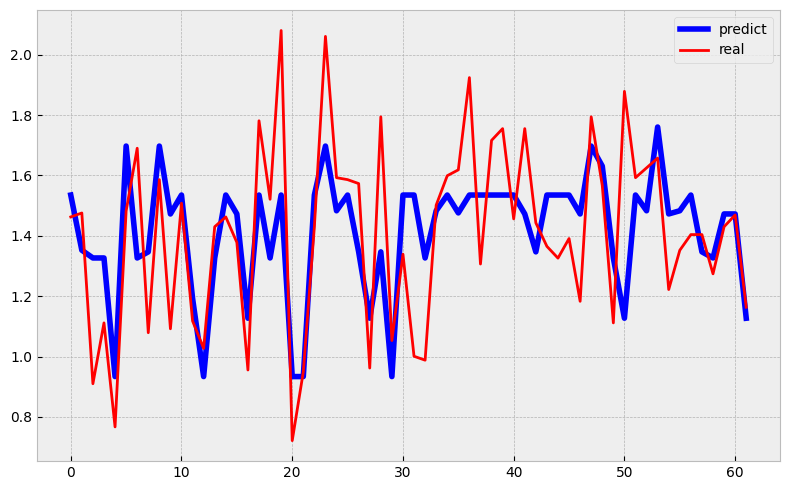

In [92]:
y_test, pred = res_pred(data_train_1,target,model_tree)
im(pred,y_test)

Посмотрим важность признаков.

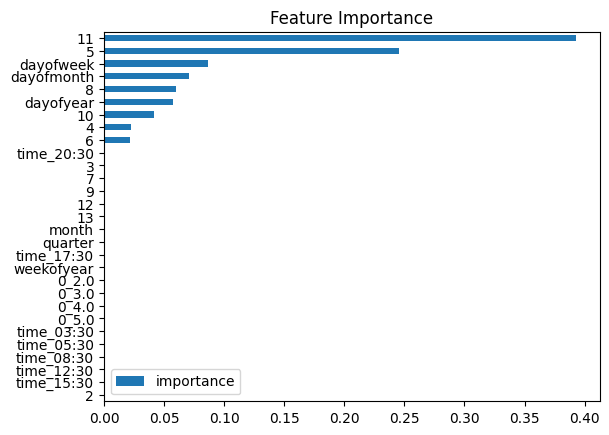

In [93]:
fi = pd.DataFrame(data=model_tree.feature_importances_,
             index=model_tree.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

# XGBRegressor

In [94]:
reg = xgb.XGBRegressor(objective='reg:squarederror',
    n_estimators=1000,
    learning_rate=0.05,
    subsample=0.5,
    colsample_bytree=1,
    max_depth=6
)

In [95]:
res = pd.DataFrame({
              '1-ый':metrics(data_train_1,target,reg),
              '2-ой':metrics(data_train_2,target,reg),
              '3-ий':metrics(data_train_1_st,target,reg),
              '4-ый':metrics(data_train_2_st,target,reg),
              '5-ый':metrics(data_train_1_norm,target,reg),
              '6-ой':metrics(data_train_2_norm,target,reg),
              '7-ой':metrics(data_train_3,target,reg),
              },
             index = ['r2_train','r2_test','rmse_train','rmse_test'])
res.T

,r2_train,r2_test,rmse_train,rmse_test
1-ый,0.999997,0.335642,0.000450,0.246360
2-ой,0.999997,0.358870,0.000463,0.242015
3-ий,0.999997,0.335642,0.000450,0.246360
4-ый,0.999997,0.358870,0.000463,0.242015
5-ый,0.999997,0.335642,0.000450,0.246360
6-ой,0.999997,0.358870,0.000463,0.242015
7-ой,0.999997,0.320104,0.000464,0.249225


Лучший резуьтат дали наборы №2, №4, №6

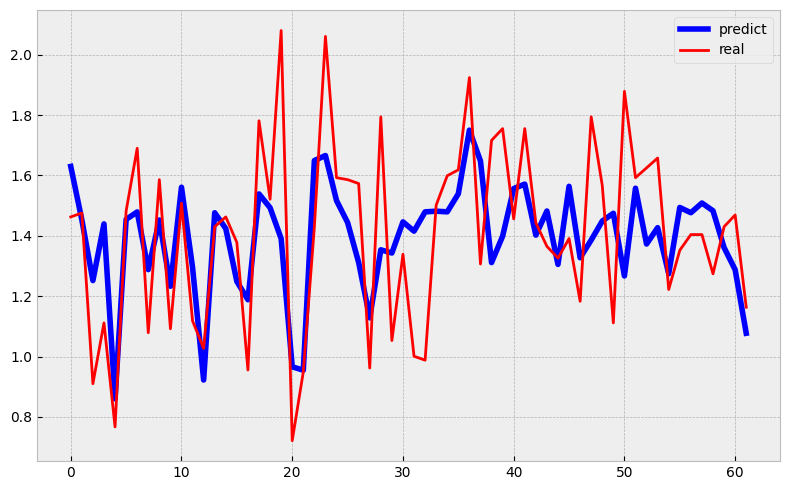

In [96]:
y_test, pred = res_pred(data_train_2_st,target,reg)
im(pred,y_test)

In [97]:
feature_importance = reg.feature_importances_
feature_importance = dict(zip(data_train_2.columns, feature_importance))
sorted_feature_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
top_features = 10
name_top_features_reg = []
print(f"Топ {top_features} самых важных признаков:")
for feature, importance in sorted_feature_importance[:top_features]:
    print(f"{feature}: {importance}")
    name_top_features_reg.append(feature)

Топ 10 самых важных признаков:
13: 0.1148739829659462
5: 0.09333742409944534
11: 0.09038460999727249
10: 0.08203605562448502
4: 0.07561436295509338
6: 0.06653517484664917
9: 0.05973700433969498
7: 0.05947012081742287
8: 0.047454483807086945
12: 0.04718058556318283


# SVR

In [98]:
res = pd.DataFrame({
              '1-ый':metrics(data_train_1,target,SVR(kernel='rbf')),
              '2-ой':metrics(data_train_2,target,SVR(kernel='rbf')),
              '3-ий':metrics(data_train_1_st,target,SVR(kernel='rbf')),
              '4-ый':metrics(data_train_2_st,target,SVR(kernel='rbf')),
              '5-ый':metrics(data_train_1_norm,target,SVR(kernel='rbf')),
              '6-ой':metrics(data_train_2_norm,target,SVR(kernel='rbf')),
              '7-ой':metrics(data_train_3,target,SVR(kernel='rbf')),
              },
             index = ['r2_train','r2_test','rmse_train','rmse_test'])
res.T

,r2_train,r2_test,rmse_train,rmse_test
1-ый,0.008409,-0.072013,0.283284,0.312946
2-ой,0.000245,-0.021648,0.284448,0.305506
3-ий,0.684822,0.438112,0.159711,0.226566
4-ый,0.606047,0.418288,0.178557,0.230528
5-ый,0.548562,0.490061,0.191141,0.215838
6-ой,0.409047,0.389035,0.218692,0.236253
7-ой,0.000251,-0.021644,0.284447,0.305506


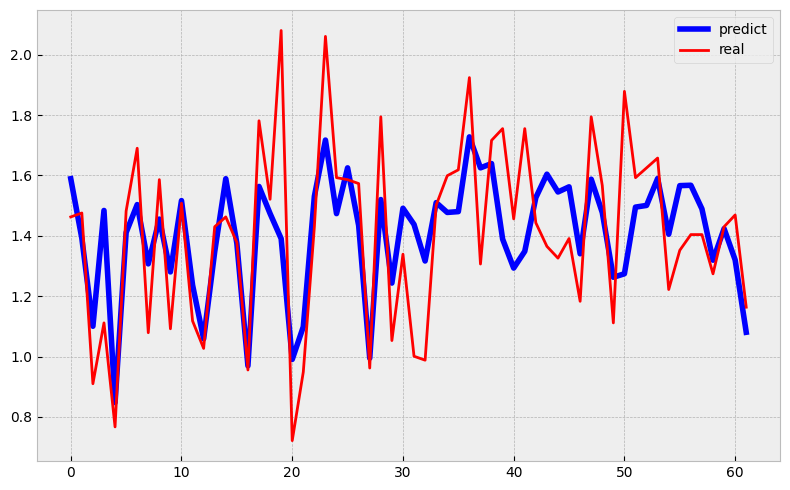

In [99]:
y_test, pred = res_pred(data_train_1_norm,target,SVR(kernel='rbf'))
im(pred,y_test)

Подберем параметры.

In [100]:
param_grid = {'C': [0.1, 1, 10],
              'epsilon': [0.1, 0.01, 0.001],
              'gamma': [0.1, 1, 10]}

In [101]:
X_train, X_test, y_train, y_test = train_test_split(data_train_1_norm,target,test_size=0.1, random_state= 42)

In [102]:
svr = SVR(kernel='rbf')

In [103]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10}


In [104]:
svr = SVR(kernel='rbf', C=1, epsilon=0.001, gamma=0.1)

In [105]:
res = pd.DataFrame({

              '5-ый':metrics(data_train_1_norm,target,svr),

              },
             index = ['r2_train','r2_test','rmse_train','rmse_test'])
res.T

,r2_train,r2_test,rmse_train,rmse_test
5-ый,0.377989,0.393763,0.224365,0.235337


Показатели ухудшились. Оставим значения по умолчанию.

In [106]:
X_train, X_test, y_train, y_test = train_test_split(data_train_1_norm,target, test_size=0.1,random_state= 42)
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

SVR()

In [107]:
r2_train = r2_score(y_train, svr.predict(X_train))
r2_test = r2_score(y_test, svr.predict(X_test))
rmse_train = sqrt(mean_squared_error(svr.predict(X_train), y_train))
rmse_test = sqrt(mean_squared_error(svr.predict(X_test), y_test))

In [108]:
res = pd.DataFrame({
              '5':[r2_train, r2_test, rmse_train, rmse_test]
              },
             index = ['r2_train','r2_test','rmse_train','rmse_test'])
res.T

,r2_train,r2_test,rmse_train,rmse_test
5,0.548562,0.490061,0.191141,0.215838


In [133]:
pd.DataFrame([svr.predict(data_test_1_norm)]).T
# .to_csv('results.csv')

,0
0,0.854377
1,0.826481
2,0.966276
3,0.896855
4,0.983253
...,...
149,1.477429
150,1.378754
151,1.344725
152,1.381984


# RandomForestRegressor

In [110]:
RF = RandomForestRegressor(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(data_train_2,target,test_size=0.2, random_state= 42)
param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['auto', 'sqrt']
}
grid_search = GridSearchCV(estimator=RF, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("Наилучшие гиперпараметры:", grid_search.best_params_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
Наилучшие гиперпараметры: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2}


In [111]:
RF = RandomForestRegressor(max_depth=10,max_features = 'sqrt', min_samples_leaf = 4,min_samples_split = 4, random_state=42)

In [112]:
res = pd.DataFrame({
              '1-ый':metrics(data_train_1,target,RF),
              '2-ой':metrics(data_train_2,target,RF),
              '3-ий':metrics(data_train_1_st,target,RF),
              '4-ый':metrics(data_train_2_st,target,RF),
              '5-ый':metrics(data_train_1_norm,target,RF),
              '6-ой':metrics(data_train_2_norm,target,RF),
              '7-ой':metrics(data_train_3,target,RF),
              },
             index = ['r2_train','r2_test','rmse_train','rmse_test'])
res.T

,r2_train,r2_test,rmse_train,rmse_test
1-ый,0.595710,0.402977,0.180885,0.233542
2-ой,0.603502,0.410410,0.179133,0.232084
3-ий,0.595928,0.404517,0.180836,0.233241
4-ый,0.603918,0.410269,0.179039,0.232111
5-ый,0.595485,0.404087,0.180935,0.233325
6-ой,0.603442,0.409148,0.179147,0.232332
7-ой,0.605817,0.376073,0.178610,0.238746


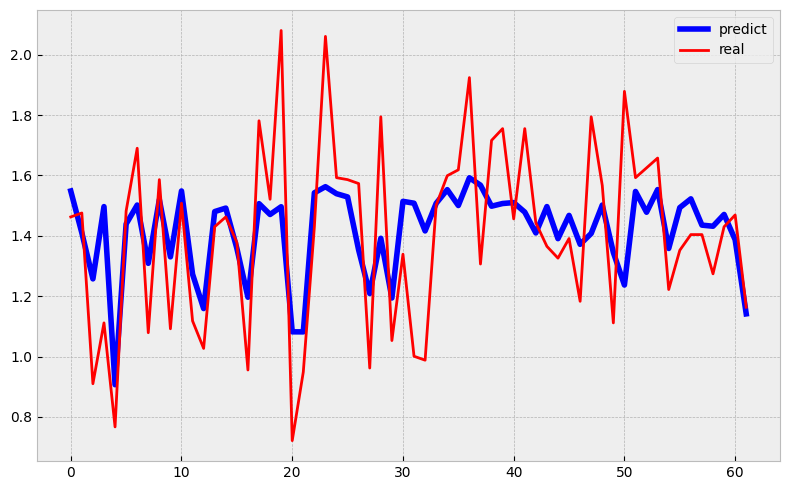

In [113]:
y_test, pred = res_pred(data_train_2,target,RF)
im(pred,y_test)

# Стэкиинг

In [114]:
st = StackingRegressor(
    [
        ('DecisionTreeClassifier', DecisionTreeRegressor(max_depth = 5 ,max_features =  'sqrt',min_samples_leaf = 6, min_samples_split = 20, random_state = 42)),
        ('RandomForestClassifier', RandomForestRegressor(max_depth=10,max_features = 'sqrt', min_samples_leaf = 4,min_samples_split = 4, random_state=42))
    ], LinearSVR(random_state=42))

In [115]:
res = pd.DataFrame({
              '1-ый':metrics(data_train_1,target,st),
              '2-ой':metrics(data_train_2,target,st),
              },
             index = ['r2_train','r2_test','rmse_train','rmse_test'])
res.T

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,r2_train,r2_test,rmse_train,rmse_test
1-ый,0.587690,0.397833,0.182670,0.234546
2-ой,0.616082,0.409051,0.176269,0.232351


# LSTM


In [116]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU
from sklearn.preprocessing import MinMaxScaler

In [117]:
lstm_data = data_train.set_index('1').drop(columns = ['target', 'time'])
y_lstm_data = data_train['target']

In [118]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [119]:
scaler_x = MinMaxScaler(feature_range=(0, 1))
dataset_x = scaler_x.fit_transform(lstm_data)
scaler_y = MinMaxScaler(feature_range=(0, 1))
dataset_y = scaler_y.fit_transform(pd.DataFrame(y_lstm_data))

In [120]:
time_steps = 1
X, y = create_dataset(pd.DataFrame(dataset_x), pd.DataFrame(dataset_y), time_steps)

In [121]:
train_size = int(len(X) * 0.9)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [122]:
lstm_data.shape

(613, 13)

In [123]:
model = Sequential()

model.add(LSTM(units=5, input_shape=(1,13)))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=2)

Epoch 1/50
550/550 - 5s - loss: 0.0103 - 5s/epoch - 8ms/step
Epoch 2/50
550/550 - 2s - loss: 0.0083 - 2s/epoch - 3ms/step
Epoch 3/50
550/550 - 1s - loss: 0.0077 - 1s/epoch - 2ms/step
Epoch 4/50
550/550 - 1s - loss: 0.0077 - 1s/epoch - 2ms/step
Epoch 5/50
550/550 - 1s - loss: 0.0076 - 1s/epoch - 2ms/step
Epoch 6/50
550/550 - 1s - loss: 0.0071 - 1s/epoch - 2ms/step
Epoch 7/50
550/550 - 1s - loss: 0.0074 - 1s/epoch - 2ms/step
Epoch 8/50
550/550 - 1s - loss: 0.0072 - 1s/epoch - 2ms/step
Epoch 9/50
550/550 - 1s - loss: 0.0071 - 1s/epoch - 2ms/step
Epoch 10/50
550/550 - 1s - loss: 0.0070 - 1s/epoch - 2ms/step
Epoch 11/50
550/550 - 1s - loss: 0.0068 - 1s/epoch - 2ms/step
Epoch 12/50
550/550 - 2s - loss: 0.0072 - 2s/epoch - 3ms/step
Epoch 13/50
550/550 - 2s - loss: 0.0069 - 2s/epoch - 3ms/step
Epoch 14/50
550/550 - 2s - loss: 0.0069 - 2s/epoch - 3ms/step
Epoch 15/50
550/550 - 1s - loss: 0.0068 - 1s/epoch - 2ms/step
Epoch 16/50
550/550 - 1s - loss: 0.0068 - 1s/epoch - 2ms/step
Epoch 17/50
550/5

In [124]:
predictions = model.predict(X_test)
predictions = scaler_y.inverse_transform(predictions)
y_test = scaler_y.inverse_transform(y_test)

2/2 [==============================] - 1s 6ms/step


In [125]:
print(f'RMSE test: {mean_squared_error(predictions, y_test,squared=False)}')
print(f'R2 test: {r2_score(y_test,predictions)}')

RMSE test: 0.21659305642080642
R2 test: 0.5483133885631277


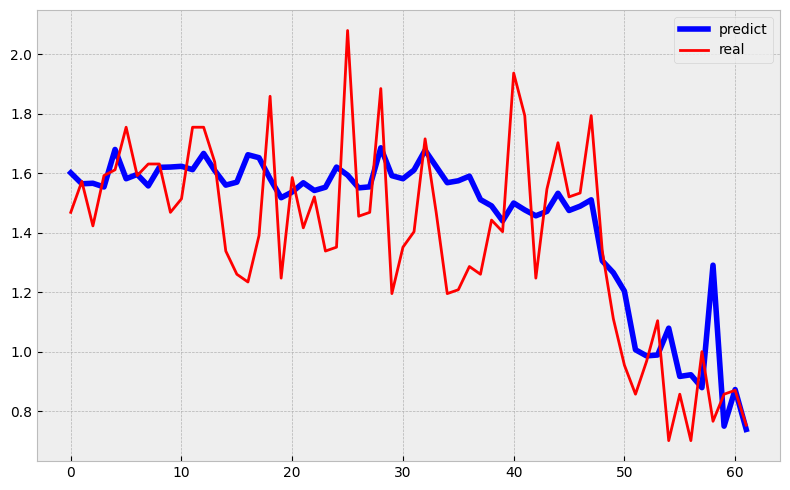

In [126]:
im(predictions, y_test)

In [127]:
predictions = model.predict(X_train)
predictions = scaler_y.inverse_transform(predictions)
y_test = scaler_y.inverse_transform(y_train)

18/18 [==============================] - 0s 2ms/step


In [128]:
print(f'RMSE train: {mean_squared_error(predictions, y_test,squared=False)}')
print(f'R2 train: {r2_score(y_test,predictions)}')

RMSE train: 0.24556074579980222
R2 train: 0.23867032537576016
